# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [75]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [18]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

I think clt applies in this use case. We can test to see if there are normal distributions of whites only, blacks only, and total. Then make our hypothesis off of that.

The null hypothesis will be that w = b, the alt will be w =! b.

We will test it by having the ratio of total accepted be equal to 1 if w = b.

In [5]:
w = data[data.race=='w']
b = data[data.race=='b']

In [42]:
m = data[data['sex']=='m']
f = data[data['sex']=='f']

In [7]:
# Your solution to Q3 here

In [32]:
w.mean()

education                3.620944
ofjobs                   3.664476
yearsexp                 7.856263
honors                   0.054209
volunteer                0.408624
military                 0.092402
empholes                 0.450103
occupspecific          214.530594
occupbroad               3.475154
workinschool             0.558111
email                    0.478850
computerskills           0.808624
specialskills            0.330185
h                        0.502259
l                        0.497741
call                     0.096509
adid                   651.777832
fracblack                0.308440
fracwhite                0.545214
lmedhhinc               10.151346
fracdropout              0.186026
fraccolp                 0.214998
linc                     9.554613
col                      0.716222
eoe                      0.291170
parent_sales           587.686462
parent_emp            2287.051514
branch_sales           196.050644
branch_emp             755.416992
fed           

In [33]:
b.mean()

education                3.616016
ofjobs                   3.658316
yearsexp                 7.829569
honors                   0.051335
volunteer                0.414374
military                 0.101848
empholes                 0.445996
occupspecific          216.744965
occupbroad               3.487885
workinschool             0.560986
email                    0.479671
computerskills           0.832444
specialskills            0.327310
h                        0.502259
l                        0.497741
call                     0.064476
adid                   651.777832
fracblack                0.313215
fracwhite                0.540330
lmedhhinc               10.143031
fracdropout              0.185319
fraccolp                 0.212639
linc                     9.547048
col                      0.722793
eoe                      0.291170
parent_sales           587.686462
parent_emp            2287.051514
branch_sales           196.050644
branch_emp             755.416992
fed           

In [44]:
f.mean()

education                3.583823
ofjobs                   3.600908
yearsexp                 7.936732
honors                   0.056060
volunteer                0.395622
military                 0.079018
empholes                 0.497597
occupspecific          225.147888
occupbroad               3.622264
workinschool             0.568073
email                    0.492258
computerskills           0.868126
specialskills            0.353444
h                        0.501602
l                        0.498398
call                     0.082488
adid                   720.716492
fracblack                0.324727
fracwhite                0.529742
lmedhhinc               10.141963
fracdropout              0.188912
fraccolp                 0.207289
linc                     9.527083
col                      0.671383
eoe                      0.285104
parent_sales           594.845703
parent_emp            2245.817871
branch_sales           217.313263
branch_emp             868.964294
fed           

In [63]:
m.mean()

education                3.733986
ofjobs                   3.862989
yearsexp                 7.530249
honors                   0.041815
volunteer                0.464413
military                 0.157473
empholes                 0.282918
occupspecific          183.943054
occupbroad               3.012455
workinschool             0.531139
email                    0.435943
computerskills           0.661922
specialskills            0.246441
h                        0.504448
l                        0.495552
call                     0.073843
adid                   422.023132
fracblack                0.265046
fracwhite                0.585697
lmedhhinc               10.164475
fracdropout              0.175003
fraccolp                 0.235323
linc                     9.629023
col                      0.879893
eoe                      0.311388
parent_sales           566.479309
parent_emp            2416.910889
branch_sales           111.348404
branch_emp             319.595581
fed           

We see that the data is HEAVILY skewed to woman. Not only is the ratio m/f 1124/3746. We also see that the resumes for females are better then the resumes for males. I don't think this is being honest with a fair assessment of how race impacts callbacks.

In [57]:
fb = f[f['race']=='b']
fw = f[f['race']=='w']
mb = m[m['race']=='b']
mw = m[m['race']=='w']

In [66]:
print(fw.call.sum())
print(fb.call.sum())
print(mw.call.sum())
print(mb.call.sum())

print(fw.call.count())
print(fb.call.count())
print(mw.call.count())
print(mb.call.count())

184.0
125.0
51.0
32.0
1860
1886
575
549


This gives us a call back ratio of 8.87% for mw, 5.83% for mb, 9.89% for fw, and 6.63% for fb.

That means that females are favored over males at a constant rate of about 1%.

overall rates are 9.65% for w and 6.45% for b.


In [67]:
w['call'].describe()

count    2435.000000
mean        0.096509
std         0.295349
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: call, dtype: float64

In [68]:
b['call'].describe()

count    2435.000000
mean        0.064476
std         0.245650
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: call, dtype: float64

In [69]:
data['call'].describe()

count    4870.000000
mean        0.080493
std         0.272083
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: call, dtype: float64

In [70]:
def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):

    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [83]:
bs_replicates = draw_bs_reps(data['call'], np.mean, size=10000)
print(bs_replicates.mean())
w_bs_replicates = draw_bs_reps(w['call'], np.mean, size=10000)
print(w_bs_replicates.mean())
b_bs_replicates = draw_bs_reps(b['call'], np.mean, size=10000)
print(b_bs_replicates.mean())

0.08050679679363966
0.09643921969160438
0.06451437357664108


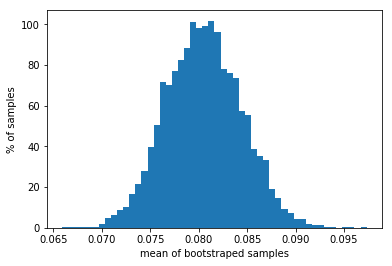

In [84]:
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean of bootstraped samples')
_ = plt.ylabel('% of samples')

# Show the plot
plt.show()

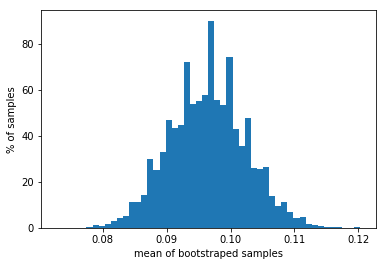

In [85]:
_ = plt.hist(w_bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean of bootstraped samples')
_ = plt.ylabel('% of samples')

# Show the plot
plt.show()

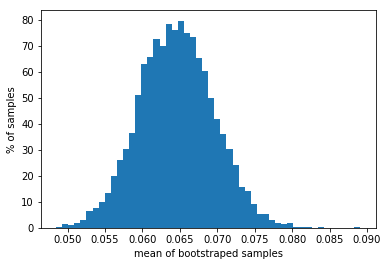

In [86]:
_ = plt.hist(b_bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean of bootstraped samples')
_ = plt.ylabel('% of samples')

# Show the plot
plt.show()

In [93]:
std_of_x = w['call'].std()/np.sqrt(4870)
std_of_x
z = (data['call'].mean() - w['call'].mean())/std_of_x
z

-3.7843781150054077

In [94]:
std_of_x = b['call'].std()/np.sqrt(4870)
std_of_x
z = (data['call'].mean() - b['call'].mean())/std_of_x
z

4.550020118457637

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

The null hypothesis was wrong. w!=b. both were far from the mean. w was almost -4 std from the mean and b was 4.5 away from the mean!!!

Both were normally distributed so I used CLT and Z testing to find the p values and bootstrapping to find the average means. 

Although the data was HEAVILY skewed towards women and there were an uneven number of entries in every category(m/f,w/b).
The results still are that white people are favored more in callbacks from employeers. I think that a more even dataset would reduce this difference slightly though.

I think sex has a much bigger role in callback success and that race plays a lesser part. seeing as how females had a whole std greater chance of getting called back then males. I think a multivariate analysis with race, sex, education, experience, skills, military, disability, age, and cover letter.

Using a more focused multivariate analysis with a balanced dataset of identical resumes for all sexes and races will do a better job at seeing if there is still discrimmination and if there is you could make a machine learning model to figure out what features are leading to discrimmination the most.